# Qual a relação entre a situação censitária do moradores de todas as regiões brasileiras e a situação de segurança alimentar dos domicílios em 2009, analisando a diferença das rendas?

     Pretendo analisar a situaçao de segurança alimentar da população de cada região brasileira em 2009, analisando suas rendas e suas situações censitárias. Por exemplo, quero analisar como é a segurança alimentar da população da região Norte e relacioná-la com a sua renda. Entretanto, farei isso com as cinco diferentes regiões do Brasil: Norte, Nordeste, Sul, Suldeste e Centro-Oeste. A partir disso, tirarei conclusões como, por exemplo: 'Na zona urbana do Nordeste, as pessoas têm maior segurança alimentar ao se comparar com a população cituada na região Norte, na zona rural, apesar de ter menor faixa de rendimento mensal.' ou '..., por ter maior faixa de rendimento mensal.'. 
     Se possível, pretendo dar hipóteses, ou argumentos baseados nos gráficos, sobre os motivos pelos quais as diferenças acontecem dessa maneira.

In [332]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [333]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
/Users/RebecaMoreno/Downloads


In [334]:
dados = pd.read_csv('/Users/RebecaMoreno/Desktop/DOM2009.csv',sep=',')

Filtros e Criações de DataFrames:

In [335]:
#criando DataFrame vazio chamado de 'df':
df = pd.DataFrame()

#mudando o nome da coluna do DataFrame 'dados' de 'UF' para 'Regiões' do novo DataFrame 'df':

df['Regiões'] = dados['UF']
pd.to_numeric(df.Regiões)

#filtrando/dividindo os Estados por Regiões:
df.Regiões[(df.Regiões >=10) & (df.Regiões <=19)] = [10]
df.Regiões[(df.Regiões >=20) & (df.Regiões <=29)] = [20]
df.Regiões[(df.Regiões >=30) & (df.Regiões <=39)] = [30]
df.Regiões[(df.Regiões >=40) & (df.Regiões <=49)] = [40]
df.Regiões[(df.Regiões >=50) & (df.Regiões <=59)] = [50]
df.Regiões = df.Regiões.astype('category')
df.Regiões.cat.categories = (['Norte','Nordeste','Suldeste','Sul','Centro-Oeste'])

#mudando o nome da coluna do DataFrame 'dados' de 'V4105' para 'Código_de_situação_censitária' do novo DataFrame 'df':

df['Código_de_situação_censitária'] = dados['V4105']

#filtrando/generalizando para vias Urbanas e Rurais o que antes estava detalhado:
df.Código_de_situação_censitária[(df.Código_de_situação_censitária >=0) & (df.Código_de_situação_censitária <=3)] = [1]
df.Código_de_situação_censitária[(df.Código_de_situação_censitária >=4) & (df.Código_de_situação_censitária <=8)] = [2]
df.Código_de_situação_censitária = df.Código_de_situação_censitária.astype('category')
df.Código_de_situação_censitária.cat.categories = (['Urbana','Rural'])

#mudando o nome da coluna do DataFrame 'dados' de 'V4623' para 'Situação_de_segurança_alimentar_do_domicílio' do novo DataFrame 'df':

df['Situação_de_segurança_alimentar_do_domicílio'] = dados['V4623']
#ignorando a diferença de moradores menores ou maiores de 18 anos
df.Situação_de_segurança_alimentar_do_domicílio[(df.Situação_de_segurança_alimentar_do_domicílio ==1) | (df.Situação_de_segurança_alimentar_do_domicílio ==6)] = [1]
df.Situação_de_segurança_alimentar_do_domicílio[(df.Situação_de_segurança_alimentar_do_domicílio ==2) | (df.Situação_de_segurança_alimentar_do_domicílio ==7)] = [2]
df.Situação_de_segurança_alimentar_do_domicílio[(df.Situação_de_segurança_alimentar_do_domicílio ==3) | (df.Situação_de_segurança_alimentar_do_domicílio ==8)] = [3]
df.Situação_de_segurança_alimentar_do_domicílio[(df.Situação_de_segurança_alimentar_do_domicílio ==4) | (df.Situação_de_segurança_alimentar_do_domicílio ==9)] = [4]
df.Situação_de_segurança_alimentar_do_domicílio = df.Situação_de_segurança_alimentar_do_domicílio.astype('category')
df.Situação_de_segurança_alimentar_do_domicílio.cat.categories = (['Tem segurança alimentar','Tem insegurança alimentar leve','Tem insegurança alimentar moderada','Tem insegurança alimentar grave'])

#mudando o nome da coluna do DataFrame 'dados' de 'V4622' para 'Faixa_do_rendimento_mensal_domiciliar_per_capita' do novo DataFrame 'df':

df['Faixa_do_rendimento_mensal_domiciliar_per_capita'] = dados['V4622']
#filtrando/ignorando o dado chamado de 'Sem declaração' dentro dessa coluna, ou seja pegando o intervalo de 0 até 7: 
df = df[(df.Faixa_do_rendimento_mensal_domiciliar_per_capita <8)] 
df.Faixa_do_rendimento_mensal_domiciliar_per_capita = df.Faixa_do_rendimento_mensal_domiciliar_per_capita.astype('category')
df.Faixa_do_rendimento_mensal_domiciliar_per_capita.cat.categories = (['Sem rendimento','Até ¼ salário mínimo','Mais de ¼ até ½ salário mínimo','Mais de ½ até 1 salário mínimo','Mais de 1 até  2 salários mínimos','Mais de  2 até  3 salários mínimos','Mais de 3 até 5 salários mínimos','Mais de 5 salários mínimos'])

#eliminando os Nan's:
df = df.dropna()

#df

//anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
//anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
//anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
//anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See th

CROSSTAB'S QUE NAO PRECISAM DE FILTROS (NOVAS DF'S) PARA PLOTAR OS GRÁFICOS NECESSÁRIOS:

In [336]:
grafRSA = pd.crosstab([df.Faixa_do_rendimento_mensal_domiciliar_per_capita],[df.Situação_de_segurança_alimentar_do_domicílio])
URtemSA = pd.crosstab([df.Código_de_situação_censitária],[df.Situação_de_segurança_alimentar_do_domicílio],normalize=True)

In [337]:
#Função que divide cada valor da tabela cruzada pelo total da última linha (quando axis=0) ou da última coluna (quando axis=1)
#Retorna tabela cruzada com valores sem casa decimais
#https://www.analyticsvidhya.com/blog/2016/01/12-pandas-techniques-python-data-manipulation/
def percConvert(tab):
    return (tab/float(tab[-1])*100).round(decimals=0)

In [338]:
#SA por Renda
ct1 = pd.crosstab(df.Situação_de_segurança_alimentar_do_domicílio,df.Faixa_do_rendimento_mensal_domiciliar_per_capita,margins=True,rownames=['Segurança Alimentar'], colnames=['Renda']).apply(percConvert, axis=0)
ct10 = pd.crosstab(df.Faixa_do_rendimento_mensal_domiciliar_per_capita,df.Situação_de_segurança_alimentar_do_domicílio,margins=True,rownames=['Segurança Alimentar'], colnames=['Renda']).apply(percConvert, axis=0)
#SA por UrbRur
ct2 = pd.crosstab(df.Situação_de_segurança_alimentar_do_domicílio,df.Código_de_situação_censitária,margins=True,rownames=['Segurança Alimentar'], colnames=['Zonas']).apply(percConvert, axis=0)
#NSLO por SA
ct3=pd.crosstab(df.Situação_de_segurança_alimentar_do_domicílio,df.Regiões,margins=True,rownames=['Segurança Alimentar'], colnames=['Regiões']).apply(percConvert, axis=0)

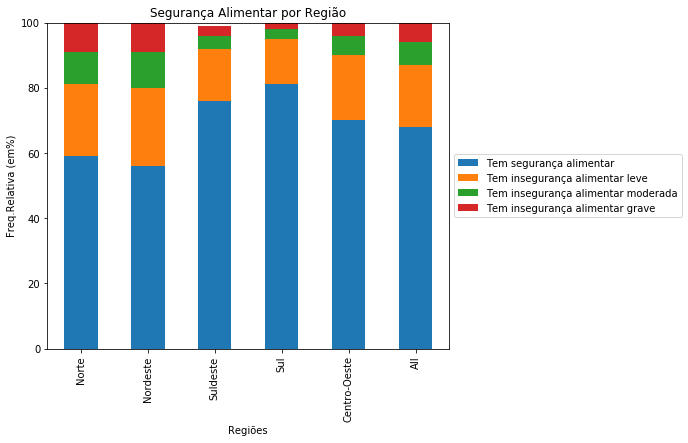

Regiões,Norte,Nordeste,Suldeste,Sul,Centro-Oeste,All
Segurança Alimentar,,,,,,
Tem segurança alimentar,59.0,56.0,76.0,81.0,70.0,68.0
Tem insegurança alimentar leve,22.0,24.0,16.0,14.0,20.0,19.0
Tem insegurança alimentar moderada,10.0,11.0,4.0,3.0,6.0,7.0
Tem insegurança alimentar grave,9.0,9.0,3.0,2.0,4.0,6.0


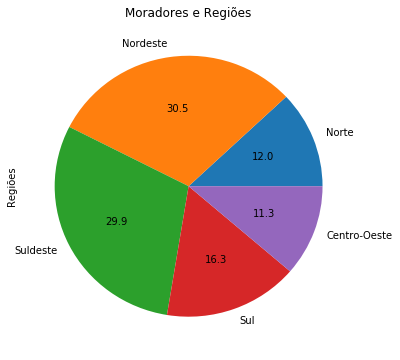

In [339]:
ct3 = ct3.iloc[0:4,:]
plot = ct3.T.plot(kind='bar', stacked=True,title='Segurança Alimentar por Região',figsize=(9,6))
plot.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em%)')

#Para legenda ficar fora do gráfico
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

#ut3= (df.Situação_de_segurança_alimentar_do_domicílio.value_counts(normalize=True)*100).round(decimals=1)#.reindex(['Muito Insatisfeito', 'Insatisfeito', 'Indiferente', 'Satisfeito', 'Muito Satisfeito'])

ut5 = df.Regiões.value_counts().reindex(['Norte','Nordeste','Suldeste','Sul','Centro-Oeste'])
plot = ut5.plot(kind='pie',title='Moradores e Regiões',autopct='%.1f',figsize=(6, 6))

ct3

    Comparando e unindo as informações contidas tanto no gráfico stacked de Segurança Alimentar por Região quanto no gráfico de setor sobre a quantidade de habitantes de todas as regiões brasileiras, é possível observar que as regiões Nordeste e Suldeste têm aproximadamente a mesma quantia de entrevistados, sendo 29.9% para Suldeste e 30.5% para Nordeste. Com isso, de acordo com o primeiro gráfico, percebemos que a região do Nordeste é a que mais sofre quanto a segurança alimentar, levando em consideração sua grande população, pois nela está presente 30.5% dos entrevistados e, desses, 9% apresentam insegurança alimentar grave.

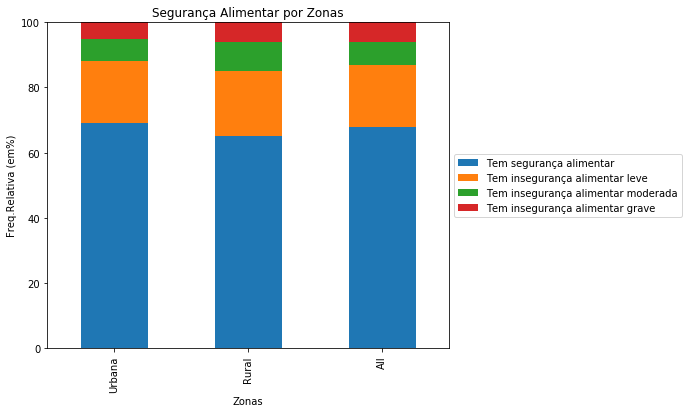

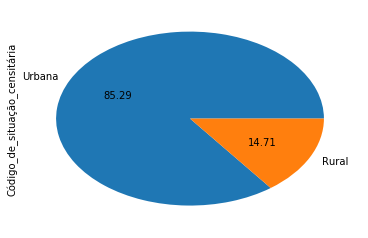

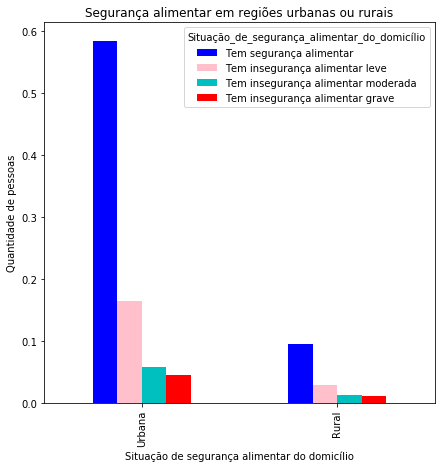

Zonas,Urbana,Rural,All
Segurança Alimentar,,,
Tem segurança alimentar,69.0,65.0,68.0
Tem insegurança alimentar leve,19.0,20.0,19.0
Tem insegurança alimentar moderada,7.0,9.0,7.0
Tem insegurança alimentar grave,5.0,7.0,6.0


In [340]:
#SA por Zonas usando crosstab
ct2 = ct2.iloc[0:4,:]
plot = ct2.T.plot(kind='bar', stacked=True,title='Segurança Alimentar por Zonas',figsize=(9,6))
plot.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em%)')
#Para legenda ficar fora do gráfico
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


fxy=df.Código_de_situação_censitária.value_counts(True)*100
fxy.plot.pie(autopct="%.2f")

URtemSA.plot(kind = 'bar',title = 'Segurança alimentar em regiões urbanas ou rurais',figsize=(7,7),color = ('b','pink','c','r'))
plt.ylabel('Quantidade de pessoas')
plt.xlabel('Situação de segurança alimentar do domicílio')
plt.show()

ct2


    O primeiro gráfico mostra que a zona Urbana tem um pouco mais de segurança alimentar do que a Rural. Entretanto, analisando o segundo gráfico, de quantidade de pessoas que habitam tais zonas, conseguimos concluir que a zona Urbana tem maior segurança alimentar comparada à zona Rural proporcionalmente.
    Além disso, embora estejamos na zona Urbana, com fast-food's rápidos, fáceis e baratos e caros alimentos saudáveis, o gráfico e a tabela acima nos dizem que a zona Rural apresenta 7% de insegurança alimentar grave, mais do que na zona Urbana, com 5%, assim como a insegurança alimentar moderada, com 9% na Rural e 7% na Urbana, ou seja, no espaço Urbano tem-se a alimentação um pouco melhorada.
    Portanto, concluimos, com essas informações, que, apesar de termos os alimentos saudáveis vindos da zona Rural, a mesma se apresenta com má alimentação, o que não me era esperado uma vez que os alimentos saudáveis estão ali presentes e em abundância para os cidadãos.

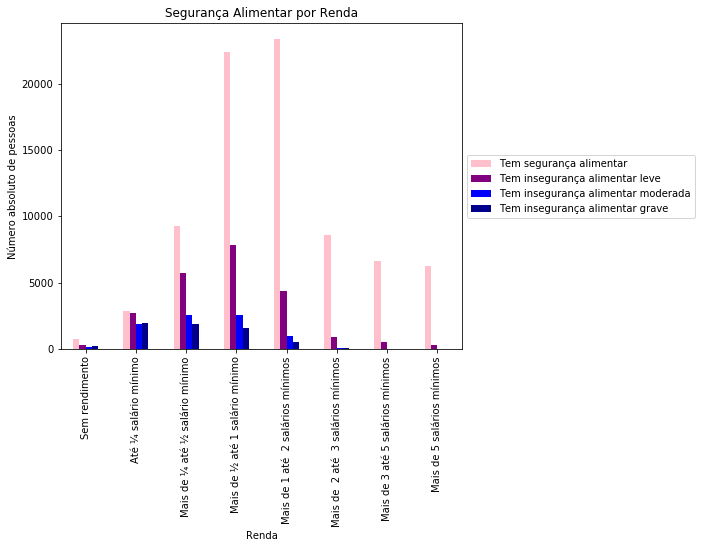

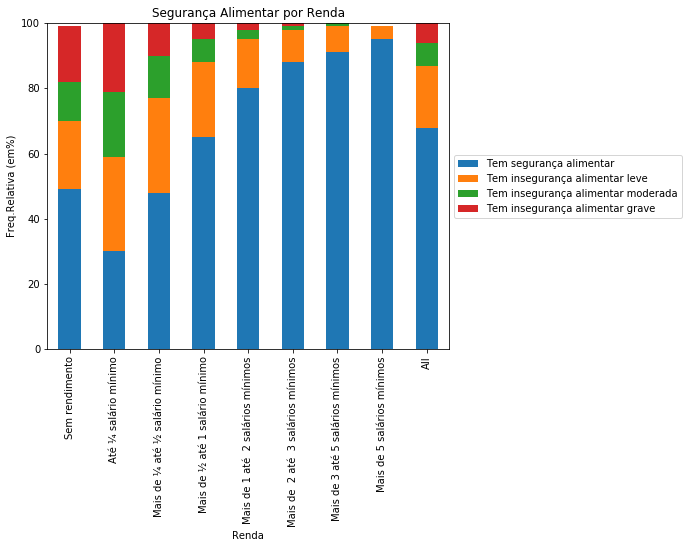

Renda,Tem segurança alimentar,Tem insegurança alimentar leve,Tem insegurança alimentar moderada,Tem insegurança alimentar grave,All
Segurança Alimentar,,,,,
Sem rendimento,1.0,2.0,2.0,4.0,1.0
Até ¼ salário mínimo,4.0,12.0,23.0,30.0,8.0
Mais de ¼ até ½ salário mínimo,12.0,25.0,31.0,30.0,17.0
Mais de ½ até 1 salário mínimo,28.0,34.0,31.0,25.0,29.0
Mais de 1 até 2 salários mínimos,29.0,19.0,12.0,9.0,25.0
Mais de 2 até 3 salários mínimos,11.0,4.0,2.0,1.0,8.0
Mais de 3 até 5 salários mínimos,8.0,3.0,1.0,0.0,6.0
Mais de 5 salários mínimos,8.0,1.0,0.0,0.0,6.0
All,100.0,100.0,100.0,100.0,100.0


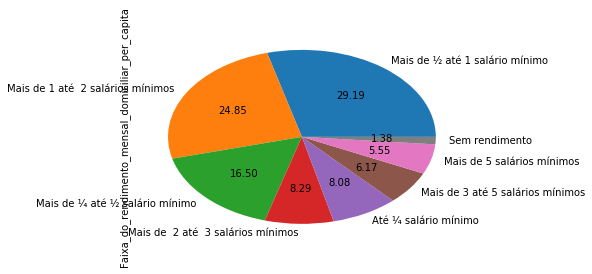

In [341]:
#GRÁFICOS SOBRE...
#SEGURANÇA ALIMENTAR X RENDA

grafRSA.plot(kind = 'bar',title = 'Segurança Alimentar por Renda',figsize=(9,6), color = ('pink','purple','b','darkblue','k','c'))
plt.ylabel('Número absoluto de pessoas')
plt.xlabel('Renda')
#Para legenda ficar fora do gráfico
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

ct1 = ct1.iloc[0:4,:]
plot = ct1.T.plot(kind='bar', stacked=True,title='Segurança Alimentar por Renda',figsize=(9,6))
plot.set_ylim([0, 100])
plt.ylabel('Freq.Relativa (em%)')

#Para legenda ficar fora do gráfico
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

f=df.Faixa_do_rendimento_mensal_domiciliar_per_capita.value_counts(True)*100
f.plot.pie(autopct="%.2f")
ct10

    Como o primeiro gráfico é de número absoluto de pessoas, podemos perceber que a maior parte das pessoas entrevistadas alegaram ter segurança alimentar. Ao se comparar com a tabela e com o gráfico de setor, analisamos que 29.19% dos entrevistados (a maior parte deles) recebe mais de 0,5 até 1 salário mínimo, e que, dentro desse grupo, 34% tem insegurança alimentar leve. Ou seja, aqueles que estão na faixa de salário médio têm uma leve insegurança alimentar, que pode ser causada pela falta de alimentação saudável por ser, talvez, a comida não saudável mais rápida e barata.
    Ao observar a faixa de pessoas mais endinheiradas (que recebem mais de 3 salários mínimos), concluimos que a maior parte tem segurança alimentar. Enquanto que, na faixa mais empobrecida (menos de 0,5 salários mínimos), apresentam gravíssima insegurança alimentar, que é até maior que a quantidade de pessoas com insegurança alimentar moderada, de acordo com os dois primeiros gráficos, o que se dá pela falta de maior rendimento para a boa alimentação desses cidadãos.
    Nota-se que tanto o gráfico de porcentagem quanto o gráfico de quantidade absoluta de pessoas são assimétricos, ou seja, a desigualdade alimentar é muito grande nas diferentes faixas de salários mínimos. Quanto menor a renda, maior a presença de insegurança alimentar, dada pela falta de dinheiro e, talvez, de conhecimento para a boa alimentação. O que nos permite concluir que a polariade e a divergência das situações de segurança alimentar dos domicílios em cada faixa do rendimento mensal domiciliar per capita são assutadoras, além de nos mostrar que em diferentes regiões do Brasil, pode-se ter insegurança ou segurança alimentar, depende de onde for e de qual for a seu rendimento mensal.